In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Results

We took different sets of data of length [50,100 , 200 ,800]

Kernel used = Linear

But the Accuracy remained constant by taking first 50, 100, 200, 800 datasets.

This maybe because the support vectors for defining the boundary are the same points in all these datasets. So, everytime the accuracy on the test dataset is same, it maybe that the decision boundary did not change when we train with those datapoints.



### Importing training dataset using pandas and converting the datagram to matrix

In [97]:
dataset = pd.read_fwf('features_train.txt',sep = " " , header = None)
dataset = dataset.values

### importing testing dataset using pandas and converting the datagram to matrix

In [98]:
testing_data = pd.read_fwf('features_test.txt', sep = " ", header = None)
testing_data = testing_data.values

In [99]:
label1 = 1
label2 = 5

### Training dataset and labels

In [100]:
dataset_5 = dataset[dataset.T[0]==label1]
dataset_0 = dataset[dataset.T[0]==label2]

train_data = np.empty([len(dataset_5)+len(dataset_0), 3])
train_labels = []
count = 0
for i in range(0, len(dataset)):

    if(dataset[i][0] == label1 or dataset[i][0] == label2):

        train_data[count] = dataset[i] 
        train_labels.append(dataset[i][0])
        count = count + 1
        
train_data = train_data[:,1:]

### Testing dataset and labels

In [101]:
test_dataset_5 = testing_data[testing_data.T[0]==label1]
test_dataset_0 = testing_data[testing_data.T[0]==label2]

test_data = np.vstack((test_dataset_5, test_dataset_0))
np.random.shuffle(test_data)

test_labels = test_data.T[0]
test_data = test_data.T[1:3].T

## SVM 

In [102]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

## DATA DIVISION

In [103]:
div = np.array([50,100,200, 800])
scores = np.empty(len(div))
support_vector = np.empty(len(div))

In [104]:
print len(train_labels[0:div[0]])
print len(train_data[0:div[0]])

print len(dataset_5)

50
50
1005


## Training the SVM

### Problem 1: 

In [105]:
for i in range(0, len(div)):
    clf = SVC(kernel = 'linear', random_state = 0, tol = 1e-2)
    train = train_data[0:div[i]]
    train_lab = train_labels[0:div[i]] 
    clf.fit( train , train_lab )
    scores[i] = clf.score(test_data, test_labels)
    support_vector[i] = len(clf.support_vectors_)

##           Dataset Size v Accuracy

accuracy =  0.9811320754716981


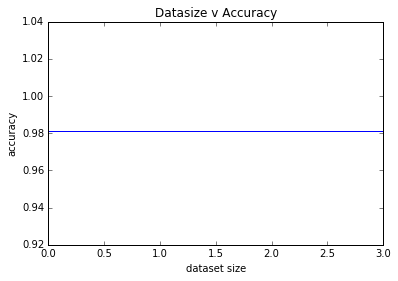

In [106]:
x = np.linspace(0,3,4)
print "accuracy = ", scores[0]
plt.title("Datasize v Accuracy")
plt.xlabel('dataset size')
plt.ylabel('accuracy')
plt.plot(x,scores)

In [107]:
print support_vector

[ 2.  4.  8. 14.]


In [108]:
print clf.support_vectors_

[[ 0.23962695 -3.3054375 ]
 [ 0.24764258 -2.31925   ]
 [ 0.16217188 -2.327625  ]
 [ 0.17714062 -2.3680625 ]
 [ 0.22025    -3.0306875 ]
 [ 0.18467578 -2.040125  ]
 [ 0.18350195 -2.1923125 ]
 [ 0.16456055 -2.7685625 ]
 [ 0.14020508 -2.8765    ]
 [ 0.2040625  -3.052875  ]
 [ 0.15241797 -2.6614375 ]
 [ 0.15593555 -3.0060625 ]
 [ 0.18180469 -3.0364375 ]
 [ 0.15175    -2.97025   ]]
